# **Soal Praktikum Convolutional Neural Network**

## Kegiatan 1 **(Individu)** 
70 poin

Pada tugas praktikum modul 2 CNN kali ini anda diminta untuk membuat model dengan kombinasi layer Convolutional, Pooling, dan Fully Connected Layer

Praktikum kali ini anda diminta menggunakan dataset breast cancer yang bisa diunduh menggunakan kaggle API dari: https://www.kaggle.com/forderation/breakhis-400x


Dataset tersebut merupakan gambar mikroskopis dengan zoom sebesar 400x pada pasien yang mengalami kanker payudara (Breast Cancer), dimana pada dataset tesebut dibagi menjadi dua kelas yaitu Tumor ganas (Malignant) dan Tumor jinak (Benign). Dataset sudah dibagi menjadi folder training dan testing yang berbeda dengan struktur sebagai berikut:
- BreaKHis 400X/train/benign/*kumpulan gambar
- BreaKHis 400X/train/malignant/*kumpulan gambar
- BreaKHis 400X/test/benign/*kumpulan gambar
- BreaKHis 400X/test/malignant/*kumpulan gambar

Anda diminta membuat 2 scenario modelling dengan kriteria sebagai berikut:
- 1. membuat model training dengan CNN, diantara layer convolution buatlah pooling menggunakan metode **maxpooling** kemudian diakhir layer CNN tambahkan **globalmaxpooling** sebelum melakukan flatten (model1)
- 2. membuat model training dengan CNN, diantara layer convolution buatlah pooling menggunakan metode **averagepooling** kemudian diakhir layer CNN tambahkan **globalaveragepooling** sebelum melakukan flatten (model2)

**NOTE :** Dalam modul ini tidak diperbolehkan menggunakan teknik transferlearning dari pretrain model baik yang di bagun sendiri atau anda dapatkan dari sumber lain (tensorflow, keras, dan sebagainya)



---



### 1. Load Data

Task yang perlu dikerjakan:
1. Unduh dataset tersebut kemudian lakukan ektraksi zip
2. Menampilkan hasil jumlah pembagian
3. Menampilkan sample sebagian gambar dari kelas yang berbeda dengan ukuran 2 baris x 4 kolom



In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadmarlianur","key":"81403f768f3dcbc9da268513b04c9ea1"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 73 Oct 24 09:16 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# jika anda ingin menggunakan kaggle API untuk mengunduh dataset gunakan
# kode berikut untuk membantu anda membuat config kaggle.json
# pastikan anda mendaftar akun kaggle terlebih dahulu
# kemudian menuju halaman my account dan buat token API anda

api_token = {"username":"muhammadmarlianur","key":"81403f768f3dcbc9da268513b04c9ea1"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d forderation/breakhis-400x

100% 803M/803M [00:05<00:00, 158MB/s]
100% 803M/803M [00:05<00:00, 161MB/s]


In [ ]:
import os
import zipfile

local_zip = 'breakhis-400x.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
!sudo apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (122 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 155047 files and directories currently install

In [ ]:
!tree -d /tmp

/tmp
├── BreaKHis 400X
│   ├── test
│   │   ├── benign
│   │   └── malignant
│   └── train
│       ├── benign
│       └── malignant
└── initgoogle_syslog_dir.0

8 directories


In [ ]:
base_dir = '/tmp/BreaKHis 400X'

benign_dir = os.path.join('/tmp/BreaKHis 400X/Parasitized') #jumlah gambar rock
train_benign_dir = os.path.join('/tmp/BreaKHis 400X/train/benign') #jumlah gambar train rock
test_benign_dir = os.path.join('/tmp/BreaKHis 400X/test/benign') #jumlah gambar validation rock

# BLOK Uninfected
malignant_dir = os.path.join('/tmp/BreaKHis 400X/Uninfected')
train_malignant_dir = os.path.join('/tmp/BreaKHis 400X/train/malignant')
test_malignant_dir = os.path.join('/tmp/BreaKHis 400X/test/malignant')


<Figure size 576x576 with 0 Axes>

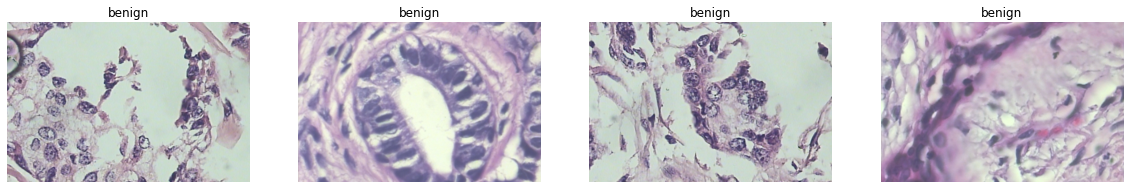

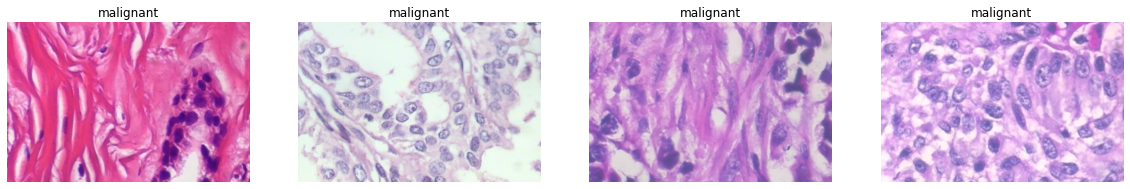

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 4

fig = plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 4)

pic_index += 8
next_benign_pix = [os.path.join(train_benign_dir, fname) 
                for fname in os.listdir(train_benign_dir)[pic_index-4:pic_index]]
next_malignant_pix = [os.path.join(train_malignant_dir, fname) 
                for fname in os.listdir(train_malignant_dir)[pic_index-4:pic_index]]

plt.figure(figsize=(20, 18))
for i, img_path in enumerate(next_benign_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.title('benign')
  plt.imshow(img)

plt.show()

plt.figure(figsize=(20, 18))
for i, img_path in enumerate(next_malignant_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.title('malignant')
  plt.imshow(img)

plt.show()


#### Contoh output kegiatan 1.3

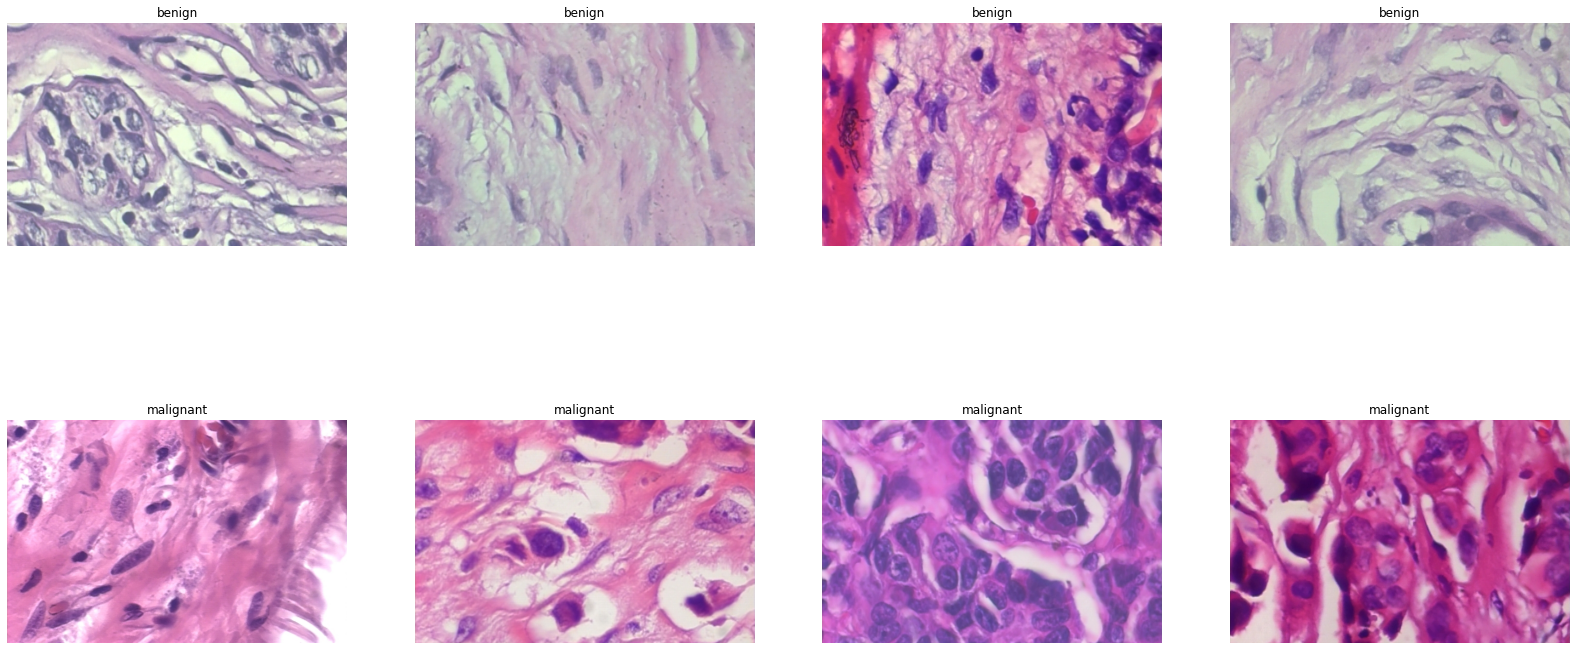

### 2. Preprocessing

Task yang perlu dikerjakan:
1. Gather data training dan testing dengan ukuran gambar **250x250**
2. Normalisasi dataset
3. Membuat label encoder


In [ ]:
import cv2
import numpy as np

training_dir = "/tmp/BreaKHis 400X/train"
# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(training_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
testing_dir = "/tmp/BreaKHis 400X/test"
# Gather data test
test_data = []
test_label = []
for r, d, f in os.walk(testing_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [ ]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("test Data = ", test_data.shape)
print("test Label = ", test_label.shape)

Train Data =  (1148, 250, 250, 3)
Train Label =  (1148,)
test Data =  (545, 250, 250, 3)
test Label =  (545,)


In [ ]:
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [172 132 217]
Data setelah di-normalisasi  [0.6745098 0.5176471 0.8509804]


In [ ]:
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[450:480])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

print("Label setelah di-encoder ", y_train[450:480])

Label sebelum di-encoder  ['malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


NameError: ignored

### 3. Modelling

Task yang perlu dikerjakan:
1. Membuat & menampilkan scenario Pertama
2. Membuat & menampilkan summary model scenario Kedua
3. Training model scenario Pertama
4. Training model scenario Kedua

**Note:** Minimal epoch yang didefinisikan adalah 100 epoch untuk setiap model yang dibangun

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, GlobalMaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, Flatten

In [ ]:
model = Sequential()

model.add(InputLayer(input_shape=[250,250,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(GlobalMaxPooling2D(data_format='channels_last'))

model.add(Flatten())

In [ ]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        3

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
H = model.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
58/58 [==============================] - 78s 1s/step - loss: 0.6219 - acc: 0.6768 - val_loss: 0.5861 - val_acc: 0.6771
Epoch 2/100
58/58 [==============================] - 76s 1s/step - loss: 0.5887 - acc: 0.6882 - val_loss: 0.5658 - val_acc: 0.7523
Epoch 3/100
58/58 [==============================] - 77s 1s/step - loss: 0.4734 - acc: 0.8040 - val_loss: 0.7841 - val_acc: 0.6183
Epoch 4/100
58/58 [==============================] - 77s 1s/step - loss: 0.4110 - acc: 0.8519 - val_loss: 0.3943 - val_acc: 0.8606
Epoch 5/100
58/58 [==============================] - 77s 1s/step - loss: 0.3801 - acc: 0.8632 - val_loss: 0.3935 - val_acc: 0.8679
Epoch 6/100
58/58 [==============================] - 77s 1s/step - loss: 0.3690 - acc: 0.8702 - val_loss: 0.3946 - val_acc: 0.8550
Epoch 7/100
58/58 [==============================] - 76s 1s/step - loss: 0.3900 - acc: 0.8580 - val_loss: 0.3940 - val_acc: 0.8569
Epoch 8/100
58/58 [==============================] - 76s 1s/step - loss: 0.3567 - a

In [ ]:
model2 = Sequential()

model2.add(InputLayer(input_shape=[250,250,3]))
model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(GlobalAveragePooling2D(data_format='channels_last'))

model2.add(Flatten())

In [ ]:
# Fully Connected Layer
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 250, 250, 16)      448       
_________________________________________________________________
average_pooling2d (AveragePo (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
average_pooling2d_1 (Average (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)       

In [ ]:
model2.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
H2 = model2.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
58/58 [==============================] - 72s 1s/step - loss: 0.5635 - acc: 0.7178 - val_loss: 0.5098 - val_acc: 0.8055
Epoch 2/100
58/58 [==============================] - 71s 1s/step - loss: 0.4574 - acc: 0.8214 - val_loss: 0.4571 - val_acc: 0.8422
Epoch 3/100
58/58 [==============================] - 71s 1s/step - loss: 0.4484 - acc: 0.8145 - val_loss: 0.5308 - val_acc: 0.8202
Epoch 4/100
58/58 [==============================] - 71s 1s/step - loss: 0.4437 - acc: 0.8319 - val_loss: 0.4488 - val_acc: 0.8440
Epoch 5/100
58/58 [==============================] - 71s 1s/step - loss: 0.4642 - acc: 0.7962 - val_loss: 0.5955 - val_acc: 0.6862
Epoch 6/100
58/58 [==============================] - 71s 1s/step - loss: 0.5109 - acc: 0.7561 - val_loss: 0.4907 - val_acc: 0.8183
Epoch 7/100
58/58 [==============================] - 71s 1s/step - loss: 0.4567 - acc: 0.8162 - val_loss: 0.5489 - val_acc: 0.7761
Epoch 8/100
58/58 [==============================] - 71s 1s/step - loss: 0.4331 - a

In [ ]:
# Tulis Kode Anda Disini

In [ ]:
score = model.evaluate(x_train, y_train)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

In [ ]:
score2 = model2.evaluate(x_train, y_train)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

### 4. Result

Task yang perlu dikerjakan:
1. Plot hasil akurasi dan loss dari kedua model menjadi 1 canvas
2. Melakukan uji coba dari salah satu gambar test pada model 1 dan model 2
3. Klasifikasi report dari kedua model
4. Jika hasil akurasi model CNN klasifikasi report kedua model diatas 90%

**Contoh output**

Tugas 4.1

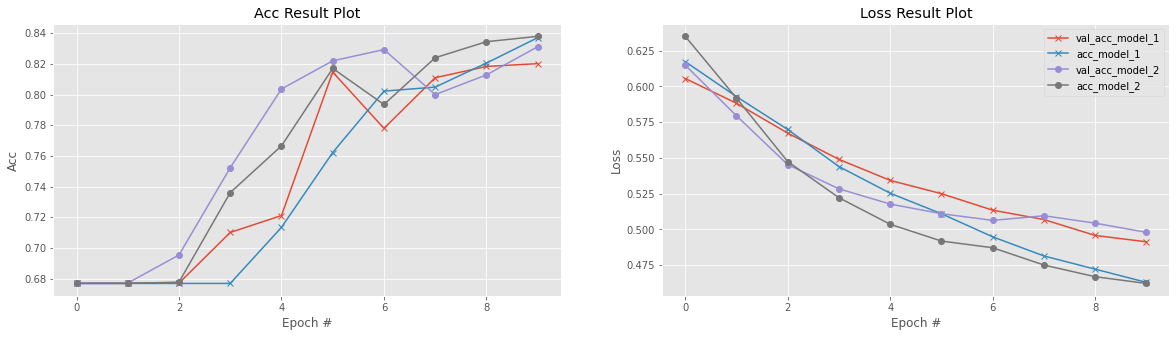

Tugas 4.2 

* Actual class ['benign']
* Hasil prediksi model 1
* Predicted class benign
* Hasil prediksi model 2
* Predicted class benign

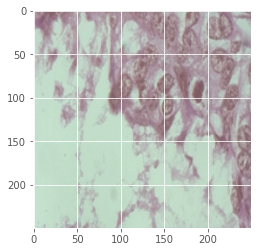

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H2.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.plot(np.arange(0, 100), H2.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H2.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       176
           1       0.92      0.93      0.93       369

    accuracy                           0.90       545
   macro avg       0.89      0.88      0.88       545
weighted avg       0.90      0.90      0.90       545



In [ ]:
from sklearn.metrics import classification_report

pred2 = model2.predict(x_test)
labels2 = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels2))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       176
           1       0.92      0.93      0.93       369

    accuracy                           0.90       545
   macro avg       0.89      0.88      0.88       545
weighted avg       0.90      0.90      0.90       545



In [ ]:
from sklearn.metrics import classification_report

pred2 = model2.predict(x_test)
labels2 = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels2))

NameError: ignored

## Kegiatan 2 **(berkelompok)**
30 poin


**Ketentuan Wajib**
* Tulis dokumentasi tugas kelompok anda dalam file README.md
* Isi data tugas kelompok anda dalam google form berikut [cek disini](https://docs.google.com/forms/d/e/1FAIpQLSfXRa5gXfd4PcaxWkKifGsaliQ5koJL3xllT-oaTpPrrXU87Q/viewform?usp=sf_link)
* Cek daftar dataset seluruh praktikan [disini](https://docs.google.com/spreadsheets/d/1qyu5AVDhPhegpRTbNaDoq5qXX4_CX09Q7tYyD-fkF_c/edit?usp=sharing)
* Seluruh data harus terkumpul maksimal H-1 praktikum
* Tidak diperbolehkan berganti anggota kelompok selama satu semester ini
* Tidak diperbolehkan berganti repository selama mengerjakan tugas kelompok ini
* Pengantian dataset atau jurnal rujukan harap menginformasikan ke asisten terlebih dahulu
* Pastikan anda menggunakan akun github pribadi untuk melakukan commit dan push

**Penilaian**
* Keaktifan dalam tim
* Kontribusi dalam proyek dan tim
* Penerapan prinsip kerja Agile (sprint backlog dan report terdokumentasikan dengan baik)
* Kelengkapan dokumen proyek
* Progress pengerjaan tugas kelompok
* Pendokumentasian proyek "clear and clean documentation"

**Materi pendukung**
* [Project documentation](https://realpython.com/documenting-python-code)
* [Github readme](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)
* [Sprint backlog](https://www.lucidchart.com/blog/how-to-develop-a-product-backlog-in-agile)


**Tugas**

Melanjutkan tugas kelompok di modul sebelumya sekarang kerjakan beberapa poin berikut untuk didemokan kepada asisten masing-masing.

*   Melakukan proses preprocessing dataset
*   Melakukan training beberapa skema model menggunakan model CNN sederhana buatan sendiri **(minimal 2 model)** *tidak diperbolehkan menggunakan transfer learning*
* Menyimpan model yang telah di training kedalam file `.h5` [Lihat disini](https://www.tensorflow.org/tutorials/keras/save_and_load)
*  Mencatat hasil perkembangan tugas kelompok dalam file `sprint_project.xlsx` tandai masing-masing task dengan status **Done** *untuk task yang telah selesai dikerjakan*, **On Going** *untuk task yang dalam proses pengerjaan*, **Waiting** *untuk task yang belum atau akan dikerjakan*
* Pastikan anda menulis tanggal mulai dan tanggal selesai masing-masing task dengan benar
* Pastikan anda menulis penanggung jawab masing-masing task (Penanggung jawab bertugas menyelesaikan dan menuntaskan masing-masing task yang diberikan)
* `commit` dan `push` seluruh perkerjaan yang anda lakukan kedalam branch pribadi dalam repository tugas kelompok yang telah anda buat sebelumnya.
* Presentasikan kepada asisten tentang apa yang anda lakukakan selama mengerjakan tugas kelompok ini. Ceritakan tentang tugas masing-masing anggota,  kendala dalam mengerjakan tugas sampai solusi yang anda lakukan saat mengerjakan tugas kelompok ini.

